# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
callback_b = sum(data[data.race=='b'].call)
# number of callbacks for white-sounding names
callback_w = sum(data[data.race=='w'].call)

print(callback_b)
print(callback_w)
print(len(data))

157.0
235.0
4870


In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


1. A Chi-Square Test is an appropriate test to compare 2 categorical variables as well as the two proportion t-test.  CLT can be used in this instance since the sample size is greater than 30.
2. 
   **Null Hypothesis:** There is no association between race and the number of call backs.
   **Alternative Hypothesis:** There is an association between race and the number of call backs 

In [5]:
# number of callbacks for black-sounding names
callback_b = sum(data[data.race=='b'].call)
# number of callbacks for white-sounding names
callback_w = sum(data[data.race=='w'].call)

w = data[data.race=='w']
b = data[data.race=='b']

# number of samples
num_w = len(w)
num_b = len(b)

# proportion receiving callbacks
pcb_w = callback_w/num_w
pcb_b = callback_b/num_b

print(('White Callbacks %:', pcb_w*100), ('Black Callbacks %:', pcb_b*100))

('White Callbacks %:', 9.650924024640657) ('Black Callbacks %:', 6.447638603696099)


### 3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

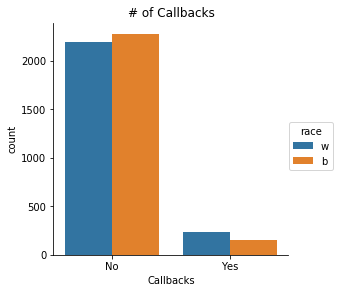

In [6]:
# plot number of callbacks by race
g = sns.factorplot(x='call', hue='race', data=data, kind='count')
plt.title('# of Callbacks')
plt.xlabel('Callbacks')
g.set_xticklabels(['No', 'Yes'])
plt.show()

**Chi-Square Test**

In [7]:
# create a contingency table
con_table = pd.crosstab(index=data.call, columns=data.race)
con_table

race,b,w
call,,
0.0,2278,2200
1.0,157,235


In [8]:
# chi square test
chi2, p, dof, ex =stats.chi2_contingency(con_table)
print(('Chi-Square:', chi2),('p-value:', p))

('Chi-Square:', 16.44902858418937) ('p-value:', 4.997578389963255e-05)


In [9]:
# calc ppf
stats.chi2.ppf(q=0.95, df=dof)

3.8414588206941236

**Two Proportion Z-test**

In [11]:
# calc variances
var_w = pcb_w*(1-pcb_w)
var_b = pcb_b*(1-pcb_b)

# proportion difference
prob_diff = pcb_w - pcb_b
print('Proportion Diff:', prob_diff)

# std error of mean
sem = np.sqrt((var_w/num_w) + (var_b/num_b))
print('Std Error of Mean:', sem)

# critical value for 95% CI
crit = stats.t.ppf(q=0.975, df=num_w-1)
print('Crit:', crit)

# z-statistic
z = prob_diff/sem
print('z-statistic:', z)

# p-value
p_1 = stats.t.sf(z, df=num_w-1)*2
print('p-value:', p_1)

# margin of error
moe = crit * sem

# 95% CI
CI = [prob_diff-moe, prob_diff+moe]
print('95% CI:', CI)

Proportion Diff: 0.032032854209445585
Std Error of Mean: 0.0077833705866767544
Crit: 1.9609391001008833
z-statistic: 4.11555043573
p-value: 3.991074585679982e-05
95% CI: [0.016770138495455986, 0.047295569923435185]


In [12]:
stats.ttest_ind(w.call, b.call)

Ttest_indResult(statistic=4.114705290861751, pvalue=3.940802103128886e-05)

### 4. Write a story describing the statistical significance in the context or the original problem.

A total of 4870 resumes were sent out, of those 2435 with black sounding names and 2435 with white sounding names. 6.44% of the resumes with black sounding names received callbacks and 9.65% of the resumes with white sounding names recevied callbacks. The difference between the two groups is 3.20%, the condfidence interval returing a range of 1.68% to 4.73%. This information inidcates resumes with black sounding names are receiving fewer callbacks. The z-statistic of 4.11 and p-value of 3.94e-05 were returned. The p-value is less than 0.05 which can lead us to reject the null hypothesis. 

### 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

The results show that there is an association between black sounding names and the number of call backs received. Further analysis is needed to determine if other variables show an equal association or stronger association with race to determine callback success.